## Contents
#### Importing libraries and data
#### Checking data quality of df_customers
#### Merging datasets, creating ords_prods_customers
#### Renaming columns for clarity
#### Checking data quality of ords_prods_customers
#### Checking some subsets
#### Finding missing values in ords_prods_customers
#### Finding average prices by day of the week and hour of the day

### Importing libraries and data

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# defining path
path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'

In [3]:
# Importing customers
df_customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), index_col = 0)

In [4]:
df_customers.head(20)

,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
user_id,,,,,,,,,
26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374
133128,Cynthia,Noble,Female,Kentucky,43,1/1/2017,2,married,49643
152052,Chris,Walton,Male,Montana,20,1/1/2017,0,single,61746
168851,Joseph,Hickman,Male,South Carolina,30,1/1/2017,0,single,63712
69965,Jeremy,Vang,Male,Texas,47,1/1/2017,1,married,162432


### Checking data quality of df_customers

In [5]:
df_customers.shape

(206209, 9)

In [6]:
df_customers.describe()

,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000
mean,49.501646,1.499823,94632.852548
std,18.480962,1.118433,42473.786988
min,18.000000,0.000000,25903.000000
25%,33.000000,0.000000,59874.000000
50%,49.000000,1.000000,93547.000000
75%,66.000000,3.000000,124244.000000
max,81.000000,3.000000,593901.000000


In [7]:
df_customers['First Name'].value_counts(dropna = False)

First Name
NaN            11259
Marilyn         2213
Barbara         2154
Todd            2113
Jeremy          2104
Cynthia         1951
Rose            1880
Kathy           1863
Steven          1844
Sarah           1840
Irene           1823
Andrea          1698
Justin          1684
Bobby           1664
Clarence        1663
Harry           1638
Alice           1629
Ruby            1622
Julie           1607
Gloria          1590
Carl            1565
Shawn           1500
Gregory         1486
Brandon         1485
Frank           1482
Thomas          1480
Marie           1467
Robin           1463
Scott           1459
Robert          1450
Russell         1448
Linda           1433
Michael         1427
Peter           1417
Harold          1409
Ruth            1399
Jerry           1393
James           1367
Brenda          1306
Stephen         1300
Ralph           1290
Henry           1272
Mary            1263
Kenneth         1262
Victor          1260
Lois            1253
Deborah         1251
Bo

In [8]:
df_customers['Surnam'].value_counts(dropna = False)

Surnam
Hamilton      252
Randall       248
Lamb          243
Pennington    243
Barnett       242
             ... 
Poole         172
Bauer         166
Pearson       164
Payne         163
Jordan        162
Name: count, Length: 1000, dtype: int64

In [9]:
df_customers['Gender'].value_counts(dropna = False)

Gender
Male      104067
Female    102142
Name: count, dtype: int64

In [10]:
df_customers['STATE'].value_counts(dropna = False)

STATE
Florida                 4044
Colorado                4044
Illinois                4044
Alabama                 4044
District of Columbia    4044
Hawaii                  4044
Arizona                 4044
Connecticut             4044
California              4044
Indiana                 4044
Arkansas                4044
Alaska                  4044
Delaware                4044
Iowa                    4044
Idaho                   4044
Georgia                 4044
Wyoming                 4043
Mississippi             4043
Oklahoma                4043
Utah                    4043
New Hampshire           4043
Kentucky                4043
Maryland                4043
Rhode Island            4043
Massachusetts           4043
Michigan                4043
New Jersey              4043
Kansas                  4043
South Dakota            4043
Minnesota               4043
Tennessee               4043
New York                4043
Washington              4043
Louisiana               4043
Montana 

In [11]:
df_customers['Age'].value_counts(dropna = False)

Age
19    3329
55    3317
51    3317
56    3306
32    3305
45    3303
43    3299
44    3298
30    3297
47    3290
68    3284
26    3277
37    3267
49    3267
75    3265
81    3263
46    3262
77    3261
74    3260
29    3255
48    3253
28    3252
63    3250
54    3250
78    3247
72    3244
64    3243
73    3241
76    3241
20    3240
24    3236
22    3236
79    3234
69    3234
53    3219
38    3207
62    3203
31    3198
40    3198
27    3197
18    3195
59    3195
80    3195
67    3191
33    3190
35    3188
34    3182
21    3176
58    3173
41    3171
42    3168
57    3167
39    3163
52    3161
70    3157
61    3153
71    3153
60    3149
23    3148
65    3145
25    3127
66    3114
50    3102
36    3101
Name: count, dtype: int64

In [12]:
df_customers['date_joined'].value_counts(dropna = False)

date_joined
9/17/2018     213
2/10/2018     212
4/1/2019      211
9/21/2019     211
12/19/2017    210
             ... 
9/1/2018      141
1/22/2018     140
11/24/2017    139
7/18/2019     138
8/6/2018      128
Name: count, Length: 1187, dtype: int64

In [13]:
df_customers['n_dependants'].value_counts(dropna = False)

n_dependants
0    51602
3    51594
1    51531
2    51482
Name: count, dtype: int64

In [14]:
df_customers['fam_status'].value_counts(dropna = False)

fam_status
married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: count, dtype: int64

In [15]:
df_customers['income'].value_counts(dropna = False)

income
57192     10
95891     10
95710     10
97532      9
98675      9
          ..
73141      1
71524      1
74408      1
44780      1
148828     1
Name: count, Length: 108012, dtype: int64

In [16]:
df_customers.isnull().sum()

First Name      11259
Surnam              0
Gender              0
STATE               0
Age                 0
date_joined         0
n_dependants        0
fam_status          0
income              0
dtype: int64

### Merging datasets, creating ords_prods_customers

In [17]:
# Import df_ords_prods_merged2
df_ords_prods_merged2 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged2.csv'), index_col = 0)

In [18]:
df_ords_prods_merged2.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,max_order,loyalty_flag,Avg_price_paid,Spending_flag,Avg_days_since_order,Frequency_flag
0,2539329,1,1,2,8,NaN,1,196,1,0,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
1,2398795,1,2,3,7,15.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
2,473747,1,3,3,12,21.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
3,2254736,1,4,4,7,29.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
4,431534,1,5,4,15,28.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer


In [19]:
# Merging df_ords_prods_merged2 and df_customers
df_ords_prods_customers = df_ords_prods_merged2.merge(df_customers, on = 'user_id', how ='inner')

In [20]:
df_ords_prods_customers.head(25)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,max_order,loyalty_flag,Avg_price_paid,Spending_flag,Avg_days_since_order,Frequency_flag,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,1,196,1,0,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
5,3367565,1,6,2,7,19.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
6,550135,1,7,1,9,20.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Busiest days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
7,3108588,1,8,1,14,14.0,0,196,2,1,both,195,Soda,77,7,9.0,Mid-range product,Busiest days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
8,2295261,1,9,1,16,0.0,0,196,4,1,both,195,Soda,77,7,9.0,Mid-range product,Busiest days,Regularly busy period,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
9,2550362,1,10,4,8,30.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### Renaming columns for clarity

In [21]:
# Changing column names
df_ords_prods_customers = df_ords_prods_customers.rename(columns={'Surnam': 'Surname'})

In [22]:
df_ords_prods_customers = df_ords_prods_customers.rename(columns={'STATE': 'State'})

In [23]:
df_ords_prods_customers = df_ords_prods_customers.rename(columns={'n_dependants': 'Number_dependants'})

In [24]:
df_ords_prods_customers = df_ords_prods_customers.rename(columns={'fam_status': 'family_status'})

In [25]:
#Checking column names
df_ords_prods_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,max_order,loyalty_flag,Avg_price_paid,Spending_flag,Avg_days_since_order,Frequency_flag,First Name,Surname,Gender,State,Age,date_joined,Number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,1,196,1,0,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### Checking data quality of ords_prods_customers

In [26]:
df_ords_prods_customers.drop(columns = ['Unnamed: 0_y'])

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,max_order,loyalty_flag,Avg_price_paid,Spending_flag,Avg_days_since_order,Frequency_flag,First Name,Surname,Gender,State,Age,date_joined,Number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,1,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23049995,2543114,72486,2,0,10,30.0,0,46235,3,0,both,Darks Liquid Laundry Detergent,75,17,12.5,Mid-range product,Busiest days,Busiest period,Most orders,5,New customer,12.500000,High spender,22.000000,Non-frequent customer,Steven,Dunn,Male,Indiana,50,7/14/2019,2,married,162789
23049996,2876636,72486,5,0,13,14.0,0,46235,3,1,both,Darks Liquid Laundry Detergent,75,17,12.5,Mid-range product,Busiest days,Busiest period,Most orders,5,New customer,12.500000,High spender,22.000000,Non-frequent customer,Steven,Dunn,Male,Indiana,50,7/14/2019,2,married,162789
23049997,876147,129743,3,1,15,24.0,0,46235,2,0,both,Darks Liquid Laundry Detergent,75,17,12.5,Mid-range product,Busiest days,Busiest period,Most orders,3,New customer,12.500000,High spender,24.000000,Non-frequent customer,Matthew,Hurley,Male,Wisconsin,51,6/15/2018,0,single,52258
23049998,1970552,47454,1,5,10,NaN,1,20112,3,0,both,Garbage Bags Small - 30 CT,60,17,5.3,Mid-range product,Regularly busy,Busiest period,Most orders,1,New customer,5.300000,Low spender,NaN,NaN,Sharon,Zhang,Female,New Hampshire,43,11/3/2017,1,married,41303


In [27]:
df_ords_prods_customers.dtypes

order_id                    int64
user_id                     int64
order_number                int64
order_day_of_week           int64
order_hour_of_day           int64
days_since_prior_order    float64
new_customer                int64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
_merge                     object
Unnamed: 0_y                int64
product_name               object
aisle_id                    int64
department_id               int64
prices                    float64
price_range_loc            object
busiest days               object
busiest period             object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
Avg_price_paid            float64
Spending_flag              object
Avg_days_since_order      float64
Frequency_flag             object
First Name                 object
Surname                    object
Gender                     object
State         

In [28]:
df_ords_prods_customers.shape

(23050000, 35)

In [29]:
df_ords_prods_customers['order_id'].value_counts(dropna=False)

order_id
1564244    108
790903      80
61355       79
598905      79
2621625     76
          ... 
82574        1
2254341      1
2366443      1
1784108      1
932997       1
Name: count, Length: 3112907, dtype: int64

In [30]:
df_ords_prods_customers['user_id'].value_counts(dropna=False)

user_id
201268    2769
182401    2235
129928    2200
79106     1988
137629    1976
          ... 
145547       1
133772       1
118194       1
176617       1
42251        1
Name: count, Length: 205866, dtype: int64

In [31]:
df_ords_prods_customers['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    11209209
Loyal customer       7556392
New customer         4284399
Name: count, dtype: int64

In [32]:
df_ords_prods_customers['order_number'].value_counts(dropna=False)

order_number
1     1442842
3     1423863
2     1423541
4     1267555
5     1138043
6     1030573
7      936637
8      856896
9      790130
10     726705
11     673076
12     621399
13     582218
14     541202
15     503294
16     472444
17     443913
18     418033
19     393354
20     368749
21     349734
22     330536
23     313432
24     296244
25     281584
26     267020
27     253814
28     241418
29     229615
30     218499
31     209530
32     199266
33     189111
34     180300
35     171485
36     164837
37     156549
38     148633
39     142880
40     136591
41     128759
42     123750
43     118039
44     112126
45     106666
46     101303
47      95827
48      91208
49      86095
50      81519
51      77176
52      73032
53      68430
54      64446
55      62075
56      58023
57      54973
58      52430
59      49883
60      47823
61      45022
62      42915
63      40883
64      38997
65      36893
66      35428
67      34054
68      32971
69      31516
70      30132
71     

In [33]:
df_ords_prods_customers['order_day_of_week'].value_counts(dropna=False)

order_day_of_week
0    4518480
1    4070890
6    3195608
2    2975836
5    2952409
3    2689010
4    2647767
Name: count, dtype: int64

In [34]:
df_ords_prods_customers['order_hour_of_day'].value_counts(dropna=False)

order_hour_of_day
10    1971462
11    1946234
14    1914850
15    1894454
13    1892598
12    1858233
16    1797661
9     1764301
17    1465117
8     1244627
18    1142480
19     877180
20     691817
7      647556
21     573645
22     459322
23     287949
6      208572
0      153904
1       79460
5       61623
2       46675
4       36013
3       34267
Name: count, dtype: int64

In [35]:
df_ords_prods_customers['days_since_prior_order'].value_counts(dropna=False)

days_since_prior_order
7.0     2518295
30.0    2136865
6.0     1822229
5.0     1536262
4.0     1501721
NaN     1442842
8.0     1389424
3.0     1352638
2.0     1041973
9.0      865979
14.0     729515
10.0     684599
1.0      656788
13.0     602227
11.0     580235
12.0     545546
15.0     475830
16.0     324100
21.0     313983
0.0      310349
17.0     268259
20.0     266486
18.0     245046
19.0     235009
22.0     218026
28.0     177396
23.0     158445
27.0     142772
24.0     134542
25.0     125472
26.0     124330
29.0     122817
Name: count, dtype: int64

In [36]:
df_ords_prods_customers['new_customer'].value_counts(dropna=False)

new_customer
0    21607158
1     1442842
Name: count, dtype: int64

In [37]:
df_ords_prods_customers['product_id'].value_counts(dropna=False)

product_id
24852    472565
13176    379450
21137    264683
21903    241921
47209    213584
          ...  
32067         5
48077         5
11234         4
34177         4
48787         3
Name: count, Length: 5424, dtype: int64

### Finding missing values in ords_prods_customers

In [38]:
# Finding missing values in df_ords_prods_customers
df_ords_prods_customers.isnull().sum()

order_id                        0
user_id                         0
order_number                    0
order_day_of_week               0
order_hour_of_day               0
days_since_prior_order    1442842
new_customer                    0
product_id                      0
add_to_cart_order               0
reordered                       0
_merge                          0
Unnamed: 0_y                    0
product_name                24292
aisle_id                        0
department_id                   0
prices                          0
price_range_loc                 0
busiest days                    0
busiest period                  0
busiest_period_of_day           0
max_order                       0
loyalty_flag                    0
Avg_price_paid                  0
Spending_flag                   0
Avg_days_since_order          548
Frequency_flag                548
First Name                1258348
Surname                         0
Gender                          0
State         

In [39]:
# Delete the 'Unnamed: 0_y' column
del df_ords_prods_customers['Unnamed: 0_y']


In [40]:
df_ords_prods_customers.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,max_order,loyalty_flag,Avg_price_paid,Spending_flag,Avg_days_since_order,Frequency_flag,First Name,Surname,Gender,State,Age,date_joined,Number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,1,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [41]:
df_ords_prods_customers['product_name'].value_counts(dropna=False)

product_name
Banana                                               472565
Bag of Organic Bananas                               379450
Organic Strawberries                                 264683
Organic Baby Spinach                                 241921
Organic Hass Avocado                                 213584
                                                      ...  
Original 2/$1 Sunflower Seeds                             5
Browning And Seasoning Sauce                              5
Crystal Flakes Sea Salt                                   4
Traditional Clean Energy Drink                            4
Cherry Nighttime Instant Teething Pain Relief Gel         3
Name: count, Length: 5423, dtype: int64

In [42]:
df_no_product_name = df_ords_prods_customers[df_ords_prods_customers['product_name'].isnull() == True]

In [43]:
df_no_product_name.head(15)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,max_order,loyalty_flag,Avg_price_paid,Spending_flag,Avg_days_since_order,Frequency_flag,First Name,Surname,Gender,State,Age,date_joined,Number_dependants,family_status,income
1090,1520353,52,10,2,10,8.0,0,116,8,0,both,NaN,93,3,10.8,Mid-range product,Regularly busy,Busiest period,Most orders,27,Regular customer,6.408876,Low spender,9.134969,Frequent customer,Dorothy,Oneal,Female,Alabama,64,1/30/2018,2,married,40974
1091,2906390,52,13,1,10,7.0,0,116,4,1,both,NaN,93,3,10.8,Mid-range product,Busiest days,Busiest period,Most orders,27,Regular customer,6.408876,Low spender,9.134969,Frequent customer,Dorothy,Oneal,Female,Alabama,64,1/30/2018,2,married,40974
1247,2139400,81,6,3,7,29.0,0,116,3,0,both,NaN,93,3,10.8,Mid-range product,Least busy days,Least busy period,Fewest orders,7,New customer,8.262963,Low spender,26.208333,Non-frequent customer,NaN,Sanchez,Male,Ohio,49,11/4/2017,1,married,123542
2539,673175,420,1,0,18,NaN,1,1511,8,0,both,NaN,84,16,14.3,Mid-range product,Busiest days,Regularly busy period,Average orders,21,Regular customer,9.536364,Low spender,13.578947,Regular customer,Deborah,Swanson,Female,Hawaii,26,10/17/2018,2,married,97248
2540,1152087,420,2,4,18,18.0,0,1511,1,1,both,NaN,84,16,14.3,Mid-range product,Least busy days,Regularly busy period,Average orders,21,Regular customer,9.536364,Low spender,13.578947,Regular customer,Deborah,Swanson,Female,Hawaii,26,10/17/2018,2,married,97248
2541,119314,420,5,3,19,16.0,0,1511,1,1,both,NaN,84,16,14.3,Mid-range product,Least busy days,Regularly busy period,Average orders,21,Regular customer,9.536364,Low spender,13.578947,Regular customer,Deborah,Swanson,Female,Hawaii,26,10/17/2018,2,married,97248
2542,2643554,420,13,4,14,3.0,0,1511,6,1,both,NaN,84,16,14.3,Mid-range product,Least busy days,Busiest period,Most orders,21,Regular customer,9.536364,Low spender,13.578947,Regular customer,Deborah,Swanson,Female,Hawaii,26,10/17/2018,2,married,97248
2543,957692,420,20,1,12,6.0,0,1511,1,1,both,NaN,84,16,14.3,Mid-range product,Busiest days,Busiest period,Most orders,21,Regular customer,9.536364,Low spender,13.578947,Regular customer,Deborah,Swanson,Female,Hawaii,26,10/17/2018,2,married,97248
3747,1150574,1024,10,6,8,1.0,0,116,1,0,both,NaN,93,3,10.8,Mid-range product,Regularly busy,Busiest period,Most orders,99,Loyal customer,10.302439,High spender,0.670732,Frequent customer,Lawrence,Lowery,Male,Arkansas,52,2/22/2018,0,single,100515
4617,366413,1480,1,3,11,NaN,1,116,7,0,both,NaN,93,3,10.8,Mid-range product,Least busy days,Busiest period,Most orders,43,Loyal customer,4.957595,Low spender,8.238411,Frequent customer,Randy,Franklin,Male,Alabama,19,12/28/2019,1,living with parents and siblings,32283


In [44]:
df_missing_1511 = df_ords_prods_customers.loc[df_ords_prods_customers['product_id'] == 1511]

In [45]:
df_missing_1511.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,max_order,loyalty_flag,Avg_price_paid,Spending_flag,Avg_days_since_order,Frequency_flag,First Name,Surname,Gender,State,Age,date_joined,Number_dependants,family_status,income
2539,673175,420,1,0,18,NaN,1,1511,8,0,both,NaN,84,16,14.3,Mid-range product,Busiest days,Regularly busy period,Average orders,21,Regular customer,9.536364,Low spender,13.578947,Regular customer,Deborah,Swanson,Female,Hawaii,26,10/17/2018,2,married,97248
2540,1152087,420,2,4,18,18.0,0,1511,1,1,both,NaN,84,16,14.3,Mid-range product,Least busy days,Regularly busy period,Average orders,21,Regular customer,9.536364,Low spender,13.578947,Regular customer,Deborah,Swanson,Female,Hawaii,26,10/17/2018,2,married,97248
2541,119314,420,5,3,19,16.0,0,1511,1,1,both,NaN,84,16,14.3,Mid-range product,Least busy days,Regularly busy period,Average orders,21,Regular customer,9.536364,Low spender,13.578947,Regular customer,Deborah,Swanson,Female,Hawaii,26,10/17/2018,2,married,97248
2542,2643554,420,13,4,14,3.0,0,1511,6,1,both,NaN,84,16,14.3,Mid-range product,Least busy days,Busiest period,Most orders,21,Regular customer,9.536364,Low spender,13.578947,Regular customer,Deborah,Swanson,Female,Hawaii,26,10/17/2018,2,married,97248
2543,957692,420,20,1,12,6.0,0,1511,1,1,both,NaN,84,16,14.3,Mid-range product,Busiest days,Busiest period,Most orders,21,Regular customer,9.536364,Low spender,13.578947,Regular customer,Deborah,Swanson,Female,Hawaii,26,10/17/2018,2,married,97248
22060,1674956,5400,13,5,16,30.0,0,1511,4,0,both,NaN,84,16,14.3,Mid-range product,Regularly busy,Regularly busy period,Average orders,29,Regular customer,8.284354,Low spender,12.223776,Regular customer,NaN,Stanley,Female,Utah,54,3/8/2018,1,married,107015
43415,2063019,11623,2,1,14,21.0,0,1511,8,0,both,NaN,84,16,14.3,Mid-range product,Busiest days,Busiest period,Most orders,6,New customer,8.941463,Low spender,21.972973,Non-frequent customer,Roy,Wade,Male,Vermont,42,6/23/2017,3,married,154174
43416,3385273,11623,4,4,11,28.0,0,1511,1,1,both,NaN,84,16,14.3,Mid-range product,Least busy days,Busiest period,Most orders,6,New customer,8.941463,Low spender,21.972973,Non-frequent customer,Roy,Wade,Male,Vermont,42,6/23/2017,3,married,154174
43417,1847142,11623,6,4,11,21.0,0,1511,5,1,both,NaN,84,16,14.3,Mid-range product,Least busy days,Busiest period,Most orders,6,New customer,8.941463,Low spender,21.972973,Non-frequent customer,Roy,Wade,Male,Vermont,42,6/23/2017,3,married,154174
49638,2122616,13069,4,2,19,2.0,0,1511,5,0,both,NaN,84,16,14.3,Mid-range product,Regularly busy,Regularly busy period,Average orders,6,New customer,7.483333,Low spender,4.920000,Frequent customer,Margaret,Kim,Female,Idaho,56,5/10/2018,3,married,127128


In [46]:
df_missing_1511['product_name'].value_counts(dropna=False)

product_name
NaN    13397
Name: count, dtype: int64

In [47]:
df_no_product_name['product_id'].value_counts(dropna=False)

product_id
1511    13397
34       6536
116      4359
Name: count, dtype: int64

In [48]:
df_missing_34 = df_ords_prods_customers.loc[df_ords_prods_customers['product_id'] == 34]

In [49]:
df_missing_34.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,max_order,loyalty_flag,Avg_price_paid,Spending_flag,Avg_days_since_order,Frequency_flag,First Name,Surname,Gender,State,Age,date_joined,Number_dependants,family_status,income
13297,2672147,3794,13,4,9,7.0,0,34,16,0,both,NaN,121,14,12.2,Mid-range product,Least busy days,Busiest period,Most orders,86,Loyal customer,8.381895,Low spender,4.474576,Frequent customer,Albert,Rowe,Male,Maine,65,2/16/2018,1,married,165736
13298,567179,3794,47,5,12,0.0,0,34,3,1,both,NaN,121,14,12.2,Mid-range product,Regularly busy,Busiest period,Most orders,86,Loyal customer,8.381895,Low spender,4.474576,Frequent customer,Albert,Rowe,Male,Maine,65,2/16/2018,1,married,165736
13299,1652862,3794,86,4,9,7.0,0,34,2,1,both,NaN,121,14,12.2,Mid-range product,Least busy days,Busiest period,Most orders,86,Loyal customer,8.381895,Low spender,4.474576,Frequent customer,Albert,Rowe,Male,Maine,65,2/16/2018,1,married,165736
82449,1783112,24521,27,5,19,8.0,0,34,26,0,both,NaN,121,14,12.2,Mid-range product,Regularly busy,Regularly busy period,Average orders,52,Loyal customer,7.146973,Low spender,7.148883,Frequent customer,Harold,Zavala,Male,South Carolina,58,8/10/2019,1,married,59210
82450,1263590,24521,28,5,20,7.0,0,34,14,1,both,NaN,121,14,12.2,Mid-range product,Regularly busy,Regularly busy period,Average orders,52,Loyal customer,7.146973,Low spender,7.148883,Frequent customer,Harold,Zavala,Male,South Carolina,58,8/10/2019,1,married,59210


In [50]:
df_missing_34['product_name'].value_counts(dropna = False)

product_name
NaN    6536
Name: count, dtype: int64

In [51]:
df_missing_34

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,max_order,loyalty_flag,Avg_price_paid,Spending_flag,Avg_days_since_order,Frequency_flag,First Name,Surname,Gender,State,Age,date_joined,Number_dependants,family_status,income
13297,2672147,3794,13,4,9,7.0,0,34,16,0,both,NaN,121,14,12.2,Mid-range product,Least busy days,Busiest period,Most orders,86,Loyal customer,8.381895,Low spender,4.474576,Frequent customer,Albert,Rowe,Male,Maine,65,2/16/2018,1,married,165736
13298,567179,3794,47,5,12,0.0,0,34,3,1,both,NaN,121,14,12.2,Mid-range product,Regularly busy,Busiest period,Most orders,86,Loyal customer,8.381895,Low spender,4.474576,Frequent customer,Albert,Rowe,Male,Maine,65,2/16/2018,1,married,165736
13299,1652862,3794,86,4,9,7.0,0,34,2,1,both,NaN,121,14,12.2,Mid-range product,Least busy days,Busiest period,Most orders,86,Loyal customer,8.381895,Low spender,4.474576,Frequent customer,Albert,Rowe,Male,Maine,65,2/16/2018,1,married,165736
82449,1783112,24521,27,5,19,8.0,0,34,26,0,both,NaN,121,14,12.2,Mid-range product,Regularly busy,Regularly busy period,Average orders,52,Loyal customer,7.146973,Low spender,7.148883,Frequent customer,Harold,Zavala,Male,South Carolina,58,8/10/2019,1,married,59210
82450,1263590,24521,28,5,20,7.0,0,34,14,1,both,NaN,121,14,12.2,Mid-range product,Regularly busy,Regularly busy period,Average orders,52,Loyal customer,7.146973,Low spender,7.148883,Frequent customer,Harold,Zavala,Male,South Carolina,58,8/10/2019,1,married,59210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23021622,1247909,6715,4,3,10,30.0,0,34,5,0,both,NaN,121,14,12.2,Mid-range product,Least busy days,Busiest period,Most orders,5,New customer,8.240000,Low spender,30.000000,Non-frequent customer,Joe,Wise,Male,Massachusetts,49,7/30/2019,1,married,74193
23021919,1631787,42471,1,6,14,NaN,1,34,7,0,both,NaN,121,14,12.2,Mid-range product,Regularly busy,Busiest period,Most orders,13,Regular customer,8.430000,Low spender,17.000000,Regular customer,Anne,Montgomery,Female,Pennsylvania,55,1/25/2018,1,married,96732
23021920,541397,42471,3,3,21,20.0,0,34,4,1,both,NaN,121,14,12.2,Mid-range product,Least busy days,Regularly busy period,Average orders,13,Regular customer,8.430000,Low spender,17.000000,Regular customer,Anne,Montgomery,Female,Pennsylvania,55,1/25/2018,1,married,96732
23021921,2380739,42471,4,0,11,11.0,0,34,6,1,both,NaN,121,14,12.2,Mid-range product,Busiest days,Busiest period,Most orders,13,Regular customer,8.430000,Low spender,17.000000,Regular customer,Anne,Montgomery,Female,Pennsylvania,55,1/25/2018,1,married,96732


In [52]:
del df_ords_prods_customers['_merge']

In [53]:
df_dups = df_ords_prods_customers[df_ords_prods_customers.duplicated()]

In [54]:
df_dups

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,max_order,loyalty_flag,Avg_price_paid,Spending_flag,Avg_days_since_order,Frequency_flag,First Name,Surname,Gender,State,Age,date_joined,Number_dependants,family_status,income


### Finding average prices by day of the week and hour of the day

In [61]:
# Remove rows with outlier value from the DataFrame
df_ords_prods_customers = df_ords_prods_customers[df_ords_prods_customers['prices'] != 14900]

In [62]:
df_ords_prods_customers.groupby('order_day_of_week')['prices'].mean()

order_day_of_week
0    7.938687
1    7.851335
2    7.844213
3    7.845898
4    7.849504
5    7.855045
6    7.940965
Name: prices, dtype: float64

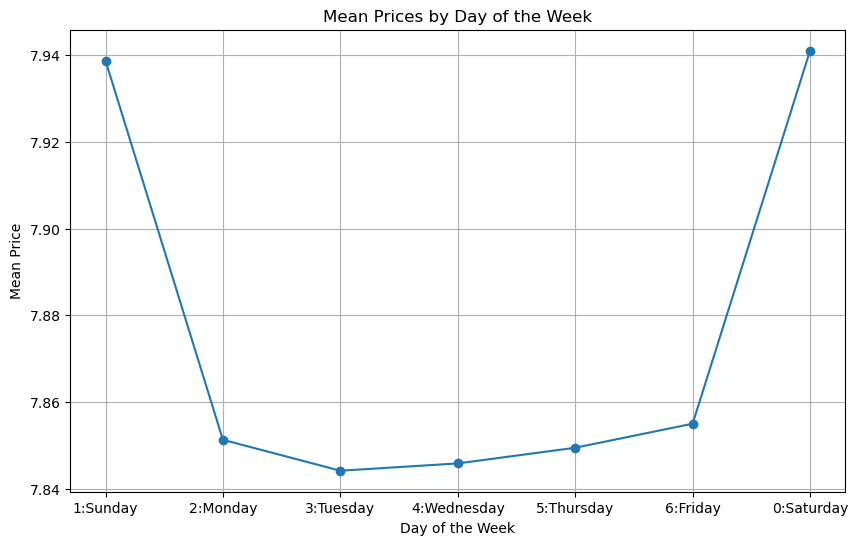

In [68]:
mean_prices_by_day = df_ords_prods_customers.groupby('order_day_of_week')['prices'].mean()

# Create a line graph for the mean prices by day
plt.figure(figsize=(10, 6))
mean_prices_by_day.plot(marker='o', linestyle='-')

plt.title('Mean Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Price')
plt.grid(True)

# Set the x-axis labels to the day names (e.g., 'Sunday', 'Monday')
days_of_week = ['1:Sunday', '2:Monday', '3:Tuesday', '4:Wednesday', '5:Thursday', '6:Friday', '0:Saturday']
plt.xticks(mean_prices_by_day.index, days_of_week)

# Define the file path to save the chart
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'line_mean_prices_dow.png')

# Save the chart to the specified path
plt.savefig(save_path)

# Display the line graph
plt.show()

In [64]:
df_ords_prods_customers.groupby('order_day_of_week').agg({'prices': ['mean','min','max']})

prices           
                       mean  min   max
order_day_of_week                     
0                  7.938687  1.0  25.0
1                  7.851335  1.0  25.0
2                  7.844213  1.0  25.0
3                  7.845898  1.0  25.0
4                  7.849504  1.0  25.0
5                  7.855045  1.0  25.0
6                  7.940965  1.0  25.0

In [65]:
df_ords_prods_customers.groupby('order_hour_of_day')['prices'].mean()

order_hour_of_day
0     7.879045
1     7.873733
2     7.878486
3     7.914681
4     7.899150
5     7.913873
6     7.904514
7     7.896981
8     7.872027
9     7.838926
10    7.840767
11    7.856075
12    7.877245
13    7.882768
14    7.894444
15    7.899055
16    7.896810
17    7.900059
18    7.904747
19    7.893128
20    7.892297
21    7.886626
22    7.891048
23    7.869565
Name: prices, dtype: float64

In [66]:
df_ords_prods_customers.groupby('order_hour_of_day').agg({'prices': ['mean','min','max']})

prices           
                       mean  min   max
order_hour_of_day                     
0                  7.879045  1.0  25.0
1                  7.873733  1.0  25.0
2                  7.878486  1.0  25.0
3                  7.914681  1.0  25.0
4                  7.899150  1.0  25.0
5                  7.913873  1.0  25.0
6                  7.904514  1.0  25.0
7                  7.896981  1.0  25.0
8                  7.872027  1.0  25.0
9                  7.838926  1.0  25.0
10                 7.840767  1.0  25.0
11                 7.856075  1.0  25.0
12                 7.877245  1.0  25.0
13                 7.882768  1.0  25.0
14                 7.894444  1.0  25.0
15                 7.899055  1.0  25.0
16                 7.896810  1.0  25.0
17                 7.900059  1.0  25.0
18                 7.904747  1.0  25.0
19                 7.893128  1.0  25.0
20                 7.892297  1.0  25.0
21                 7.886626  1.0  25.0
22                 7.891048  1.0  25.0
23                 7.869565  1.0  25.0

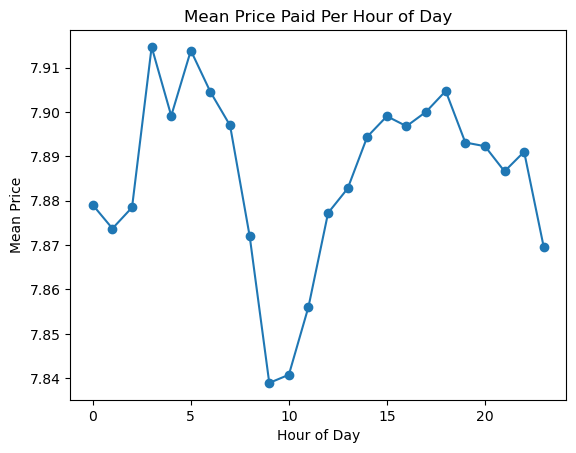

In [76]:
# Creating line graph of mean price paid per hour of ay
# Group by 'order_hour_of_day' and calculate the mean of 'prices'
hourly_mean_prices = df_ords_prods_customers.groupby('order_hour_of_day')['prices'].mean()

# Create a line graph
hourly_mean_prices.plot(kind='line', marker='o')

# Set labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Mean Price')
plt.title('Mean Price Paid Per Hour of Day')

# Define the file path to save the chart
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'line_mean_prices_by_hour.png')

# Save the chart to the specified path
plt.savefig(save_path)

# Show the plot
plt.show()


In [71]:
# Finding average total amount paid per loyalty flag
average_total_amount_paid = df_ords_prods_customers.groupby('loyalty_flag')['prices'].sum() / df_ords_prods_customers.groupby('loyalty_flag')['user_id'].nunique()

In [72]:
average_total_amount_paid

loyalty_flag
Loyal customer      3504.227057
New customer         300.241619
Regular customer    1154.336289
dtype: float64

In [73]:
# Finding percentage of customers in each loyalty status
loyalty_flag_counts = df_ords_prods_customers['loyalty_flag'].value_counts(dropna=False)
loyalty_flag_percentage = (loyalty_flag_counts / loyalty_flag_counts.sum()) * 100

In [74]:
loyalty_flag_percentage

loyalty_flag
Regular customer    48.629609
Loyal customer      32.783523
New customer        18.586869
Name: count, dtype: float64

In [67]:
# Export data to csv
df_ords_prods_customers.to_csv(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_customers.csv'))